In [ ]:
pip install qutip

In [ ]:
pip install qutip_qip

In [ ]:
pip install qiskit

In [41]:
import numpy as np
import matplotlib.pyplot as plt

#### QUTIP ####
import qutip
from qutip import Bloch
from qutip.qip.operations import hadamard_transform

####  QISKIT ####
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_vector
from qiskit.circuit.library import XGate, YGate, ZGate, HGate

## Compuertas cuánticas básicas (qutip)

Tarea 1:


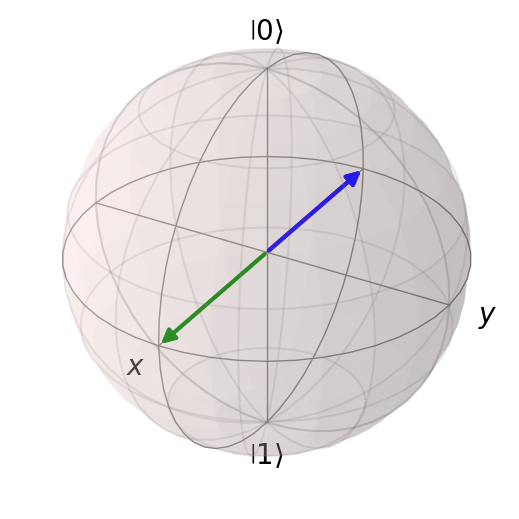

In [37]:
# Definir los estados base |0⟩ y |1⟩
zero = basis(2, 0)
one = basis(2, 1)

# -------------------------
# Tarea 1
# Estado: |ψ⟩ = (|0⟩ + |1⟩)/√2
print("Tarea 1:")
psi = (zero + one).unit()

# Definir las compuertas Pauli-Y y Pauli-Z
pauli_y = sigmay()
pauli_z = sigmaz()

# Aplicar compuerta Y
psi_y = pauli_y * psi

# Aplicar compuerta Z
psi_z = pauli_z * psi

# Visualización en la esfera de Bloch
b = Bloch()
b.add_states([psi, psi_y, psi_z])
b.vector_color = ['g', 'r', 'b']
b.show()

Tarea 2:


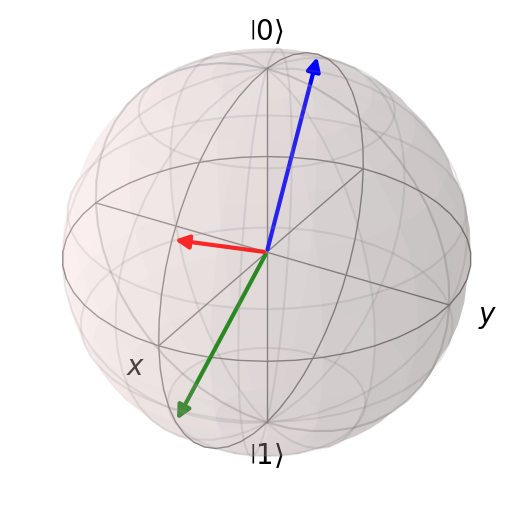

In [38]:
# -------------------------
# Tarea 2
# Estado: |φ⟩ = (1/2)|0⟩ + (√3/2)|1⟩
print("Tarea 2:")
phi = (0.5 * zero + (np.sqrt(3)/2) * one).unit()

# Definir compuerta Pauli-X y Hadamard
pauli_x = sigmax()
hadamard = hadamard_transform(1)

# Aplicar compuerta X
phi_x = pauli_x * phi

# Aplicar compuerta H
phi_h = hadamard * phi

# Visualización
b = Bloch()
b.add_states([phi, phi_x, phi_h])
b.vector_color = ['g', 'r', 'b']
b.show()

Tarea 3:


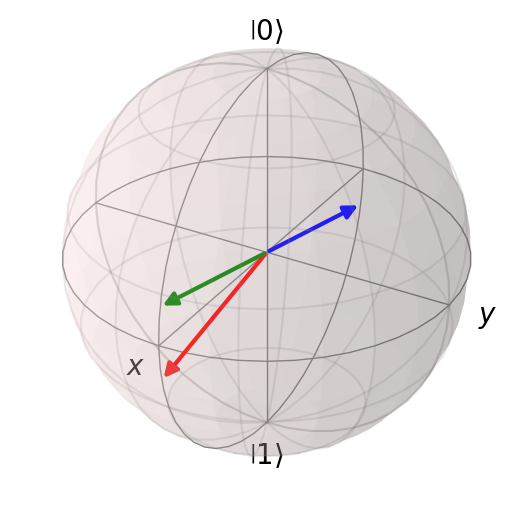

In [39]:
# -------------------------
# Tarea 3
# Estado: |μ⟩ = (√3/√5)|0⟩ + (√2/√5)|1⟩
print("Tarea 3:")
mu = (np.sqrt(3)/np.sqrt(5) * zero + np.sqrt(2)/np.sqrt(5) * one).unit()

# Aplicar compuertas X y Z consecutivamente
mu_x = pauli_x * mu # Primero aplicamos la compuerta X.
mu_xz = pauli_z * mu_x # Despues, aplicamos la compuerta Z.

# Visualización
b = Bloch()
b.add_states([mu, mu_x, mu_xz])
b.vector_color = ['g', 'r', 'b']
b.show()

## Compuertas cuánticas básicas (qiskit)

In [45]:
def state_to_bloch_vector(state):
    a = state.data[0]
    b = state.data[1]
    bloch_vector = [
        2 * np.real(np.conj(a) * b),
        2 * np.imag(np.conj(a) * b),
        np.abs(a)**2 - np.abs(b)**2]
    return bloch_vector

### Tarea 1

Tarea 1:


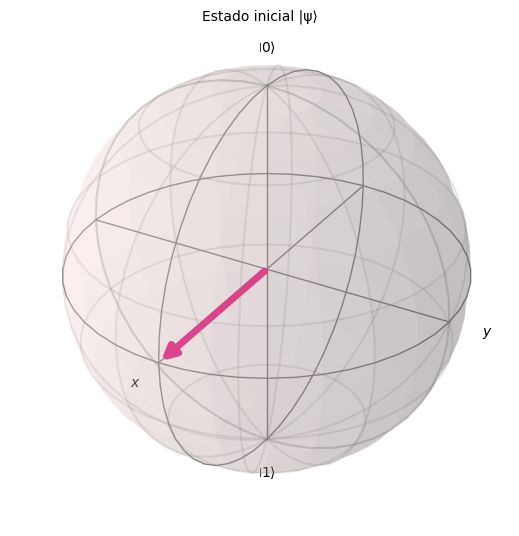

In [47]:
# -------------------------
# Tarea 1
print("Tarea 1:")
# Estado inicial |ψ⟩ = (|0⟩ + |1⟩)/√2
psi_coeffs = [1/np.sqrt(2), 1/np.sqrt(2)]
psi = Statevector(psi_coeffs)

# Visualización del estado inicial
bloch_vector_psi = state_to_bloch_vector(psi)
plot_bloch_vector(bloch_vector_psi, title="Estado inicial |ψ⟩")

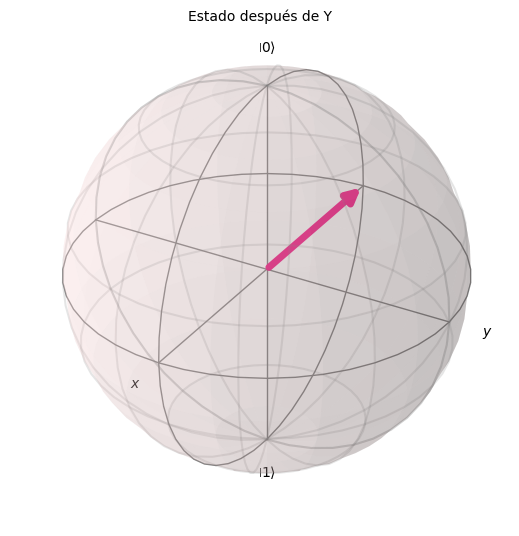

In [49]:
# Aplicar compuerta Y
psi_y = psi.evolve(YGate())
bloch_vector_psi_y = state_to_bloch_vector(psi_y)
plot_bloch_vector(bloch_vector_psi_y, title="Estado después de Y")

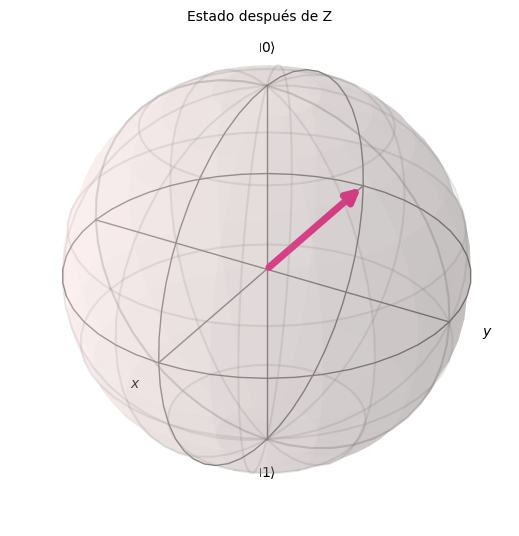

In [52]:
# Aplicar compuerta Z
psi_z = psi.evolve(ZGate())
bloch_vector_psi_z = state_to_bloch_vector(psi_z)
plot_bloch_vector(bloch_vector_psi_z, title="Estado después de Z")

### Tarea 2

Tarea 2:


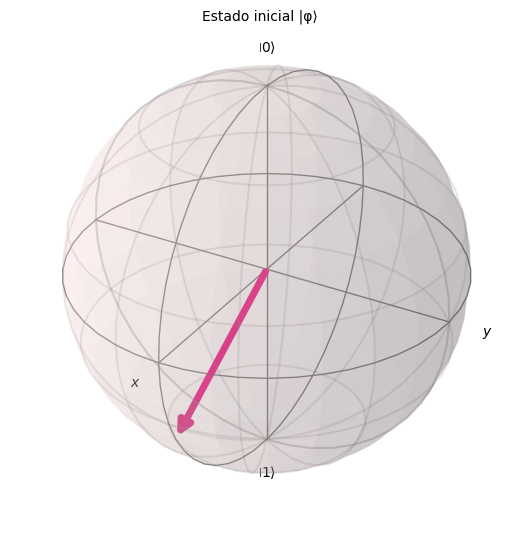

In [53]:
# -------------------------
# Tarea 2
print("Tarea 2:")
# Estado inicial |φ⟩ = (1/2)|0⟩ + (√3/2)|1⟩
phi_coeffs = [1/2, np.sqrt(3)/2]
phi = Statevector(phi_coeffs)

# Visualización del estado inicial
bloch_vector_phi = state_to_bloch_vector(phi)
plot_bloch_vector(bloch_vector_phi, title="Estado inicial |φ⟩")

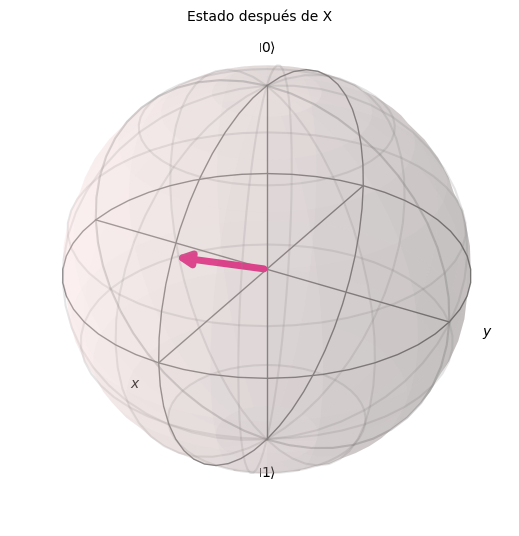

In [54]:
# Aplicar compuerta X
phi_x = phi.evolve(XGate())
bloch_vector_phi_x = state_to_bloch_vector(phi_x)
plot_bloch_vector(bloch_vector_phi_x, title="Estado después de X")

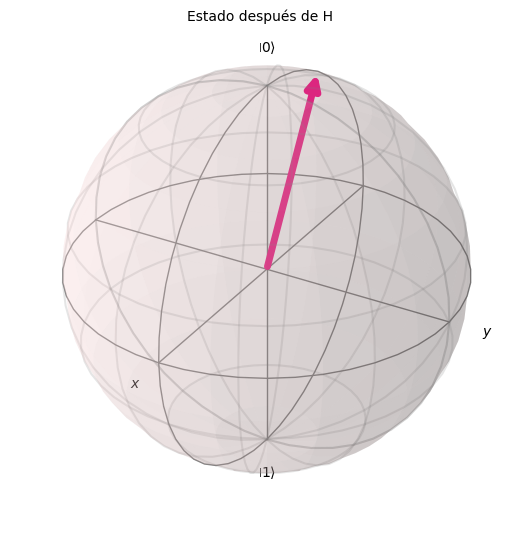

In [55]:
# Aplicar compuerta H (Hadamard)
phi_h = phi.evolve(HGate())
bloch_vector_phi_h = state_to_bloch_vector(phi_h)
plot_bloch_vector(bloch_vector_phi_h, title="Estado después de H")

### Tarea 3

Tarea 3:


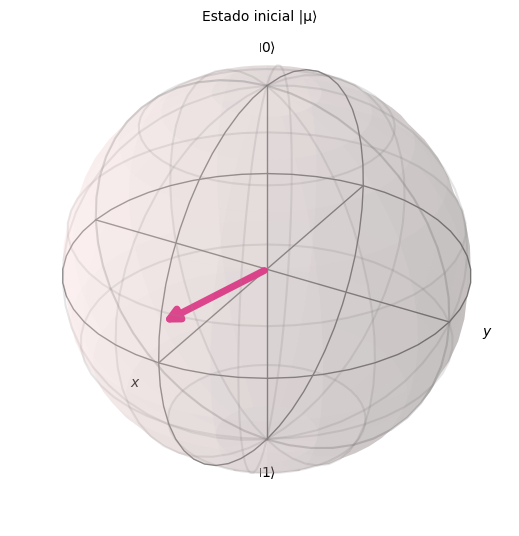

In [56]:
# -------------------------
# Tarea 3
print("Tarea 3:")
# Estado inicial |μ⟩ = (√3/√5)|0⟩ + (√2/√5)|1⟩
mu_coeffs = [np.sqrt(3)/np.sqrt(5), np.sqrt(2)/np.sqrt(5)]
mu = Statevector(mu_coeffs)

# Visualización del estado inicial
bloch_vector_mu = state_to_bloch_vector(mu)
plot_bloch_vector(bloch_vector_mu, title="Estado inicial |μ⟩")

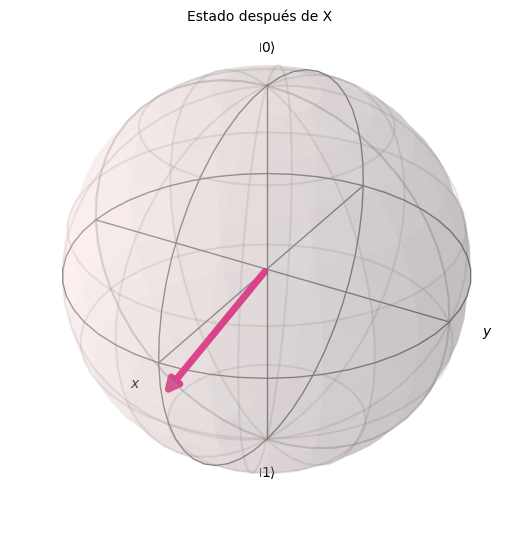

In [57]:
# Aplicar compuerta X
mu_x = mu.evolve(XGate())
bloch_vector_mu_x = state_to_bloch_vector(mu_x)
plot_bloch_vector(bloch_vector_mu_x, title="Estado después de X")

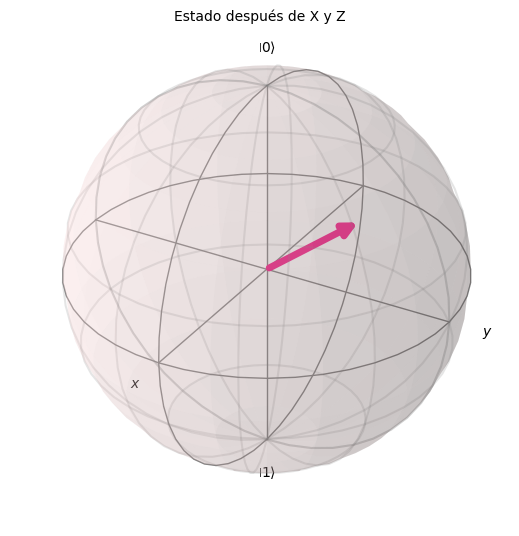

In [58]:
# Aplicar compuerta Z al resultado anterior
mu_xz = mu_x.evolve(ZGate())
bloch_vector_mu_xz = state_to_bloch_vector(mu_xz)
plot_bloch_vector(bloch_vector_mu_xz, title="Estado después de X y Z")